In [2]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import Utils.graphing_helpers
import importlib
importlib.reload(Utils.graphing_helpers)
from Utils.graphing_helpers import (plot_vicsek_phase_diagram, plot_dir_cross_vel_phase_diagram,  plot_dir_cross_vel_norm_phase_diagram, 
                                    save_fig_pdf, edges_from_centers_log)

In [46]:
exp_dir = "/home/ryanlopez/Polar_Align_Box_L=250/phi=0.6000_and_v0=0.0100"

all_J_vals = np.logspace(-3, 0, num=13)
all_Dr_vals = np.logspace(-3, 0, num=13)

J_Dr_vals = [
    (0.1778, 0.0562), 
    (0.01 ,0.001), 
    (0.018 ,0.001), 
    (0.0056, 0.001), 
    (0.01, 0.00178), 
    (0.01, 0.01), 
    (0.1, 0.1), 
    (1.0, 0.1), 
    (0.1, 0.0562), 
    (0.3162, 0.0562)
    ]

extra_J_Dr_indices = [
    [3, 4],
    [5, 4],
    [4, 3],
    [4, 5], 
    [3, 3],
    [5, 5],
    [2, 2],
    [6, 6],
    [0, 0], 
    [1, 1],
    [3, 5],
    [5, 3]
]
for (J_index, Dr_index) in extra_J_Dr_indices:
    J_Dr_vals.append((all_J_vals[J_index], all_Dr_vals[Dr_index]))

In [47]:
def load_sparse_statistic_data(value_key, J_Dr_vals, all_Dr_vals, all_J_vals, exp_dir):
    statistic_values = np.empty((len(all_Dr_vals), len(all_J_vals)))
    statistic_values[:,:] = np.nan

    all_J_bins_edges = edges_from_centers_log(all_J_vals)
    all_Dr_bins_edges = edges_from_centers_log(all_Dr_vals)
    for (J, Dr) in J_Dr_vals:
        J_index = np.digitize(J, all_J_bins_edges)
        Dr_index = np.digitize(Dr, all_Dr_bins_edges)
        
        single_simulation_stats_filename = os.path.join(exp_dir, "J=%.4f_and_Dr=%.4f"%(J, Dr), 'single_stats.json')
        with open(single_simulation_stats_filename) as stats_file:
            stats = json.loads(stats_file.read())
        statistic_values[Dr_index-1, J_index-1] = stats[value_key]
    return statistic_values

In [49]:
flocking_vals = load_sparse_statistic_data('vicsek_param', J_Dr_vals, all_Dr_vals, all_J_vals, exp_dir)
plot_vicsek_phase_diagram(all_J_vals, all_Dr_vals, flocking_vals, plt_xlabel=r'$J$', plt_ylabel=r'$D_r$')

FileNotFoundError: [Errno 2] No such file or directory: '/home/ryanlopez/Polar_Align_Box_L=250/phi=0.6000_and_v0=0.0100/J=0.0056_and_Dr=0.0100/single_stats.json'

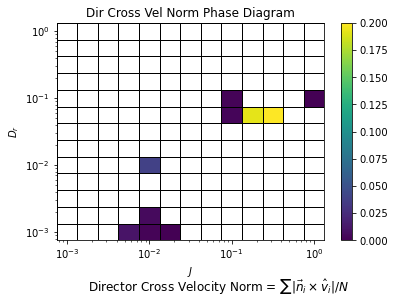

In [12]:
dir_cross_vel_norm_vals = load_sparse_statistic_data('dir_cross_vel_norm', J_Dr_vals, all_Dr_vals, all_J_vals, exp_dir)
plot_dir_cross_vel_norm_phase_diagram(all_J_vals, all_Dr_vals, dir_cross_vel_norm_vals, plt_xlabel=r'$J$', plt_ylabel=r'$D_r$', vmax=0.2)